In [27]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from datetime import datetime

In [28]:
# Reading Csv file

file_path = os.path.join("Resources","IWM.csv")
stock_df = pd.read_csv(file_path)
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/24/2019,144.429993,145.759995,144.330002,145.470001,143.540604,16976300
1,1/25/2019,146.619995,147.639999,146.429993,147.339996,145.385788,22266900
2,1/28/2019,145.960007,146.910004,145.369995,146.550003,144.606277,22784700
3,1/29/2019,146.710007,146.820007,145.880005,146.199997,144.260925,12084800
4,1/30/2019,146.979996,148.339996,145.679993,147.800003,145.839691,25516900
...,...,...,...,...,...,...,...
248,1/17/2020,170.279999,170.559998,168.669998,169.070007,169.070007,18306400
249,1/21/2020,168.360001,168.990005,167.270004,167.669998,167.669998,17935100
250,1/22/2020,168.190002,168.619995,167.179993,167.559998,167.559998,14916300
251,1/23/2020,167.100006,167.970001,165.449997,167.449997,167.449997,15947900


In [29]:
# moving average for 50 day and 100 day period in one year
short_term = 50
long_term = 100

In [30]:
# Calculating Moving Average for 50 day period
def short_term_MA(close_price,short_window):
        
    weights = np.repeat(1.0,short_window)/short_window
    MA_50 = np.convolve(close_price,weights,'valid')
    return MA_50   

In [31]:
fifty_day = short_term_MA(stock_df["Close"],short_term)
#fifty_day 

In [32]:
#len(fifty_day)

In [33]:
# Calculating Moving Average for 100 day period

def long_term_MA(close_price,long_window):
    
    weights = np.repeat(1.0,long_window)/long_window
    MA_100 = np.convolve(close_price,weights,'valid')
    return MA_100

In [34]:
hundred_day = long_term_MA(stock_df["Close"],long_term)
#hundred_day 

In [35]:
#len(hundred_day)

In [36]:
#fifty_period_ma = close_price.rolling(window=50).mean()

In [37]:
# grabbing corresponding dates for 50 day period

date_ls_50 = []
for i in range(len(stock_df)):
    if i>=short_term-1:
        date_ls_50.append(stock_df["Date"][i])
#date_ls_50   

In [38]:
# grabbing corresponding dates for 100 day period

date_ls_100 = []
for i in range(len(stock_df)):
    if i>=long_term-1:
        date_ls_100.append(stock_df["Date"][i])
#date_ls_100

In [39]:
#converting String dates to Date type
ls_50 = []

for i in range(len(date_ls_50)):
    ls_50.append(datetime.strptime(date_ls_50[i], "%m/%d/%Y"))

In [40]:
#converting String dates to Date type

ls_100 = []

for i in range(len(date_ls_100)):
    ls_100.append(datetime.strptime(date_ls_100[i], "%m/%d/%Y"))

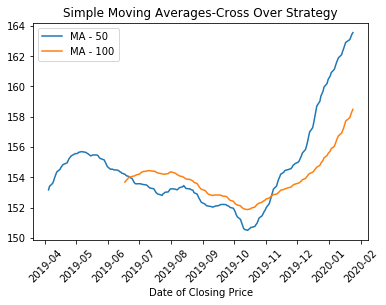

<Figure size 432x288 with 0 Axes>

In [41]:
# plotting the data 

plt.plot(ls_50,fifty_day,label="MA - 50")
plt.plot(ls_100,hundred_day,label = "MA - 100")
plt.title("Simple Moving Averages-Cross Over Strategy")
plt.xlabel("Date of Closing Price")
plt.legend(loc="best")

#mini = min(ls_50)
#maxi = max(ls_100)
#plt.xlim(mini,maxi)

plt.xticks(rotation=45)
plt.show()
plt.savefig("SMA-crossover.png")

In [42]:
print(f"Cross Over Strategy - Since the line Moving Average - 50 period crossed above Moving Average - 100 period , its a 'Golden Cross'")

Cross Over Strategy - Since the line Moving Average - 50 period crossed above Moving Average - 100 period , its a 'Golden Cross'
